<a href="https://colab.research.google.com/github/Divya-Rag/Decision-Tree-Customer-Prediction/blob/main/Task_3_Decision_Tree_Customer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Load the dataset

In [2]:
df=pd.read_csv('bank-additional-full.csv', sep=';')
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

Data Preprocessing

In [3]:
print(df.isnull().sum())
df_encoded = pd.get_dummies(df, drop_first=True)
x=df_encoded.drop('y_yes', axis=1)
y=df_encoded['y_yes']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Train the Decision Tree Classifier

In [4]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

y_predict = dt_model.predict(X_test)

Evaluation

Accuracy: 0.9161608804726066
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95     10968
        True       0.65      0.55      0.60      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.76      0.77     12357
weighted avg       0.91      0.92      0.91     12357



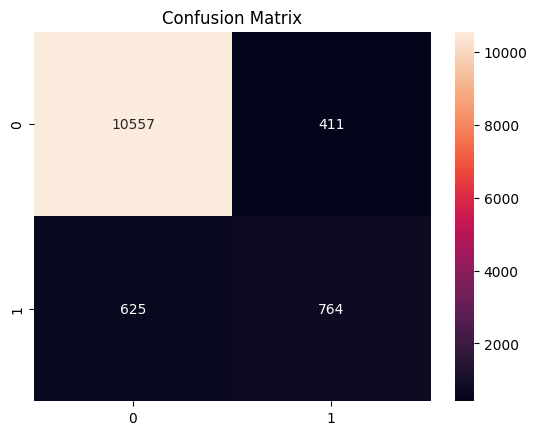

In [5]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

Visualize the decision tree

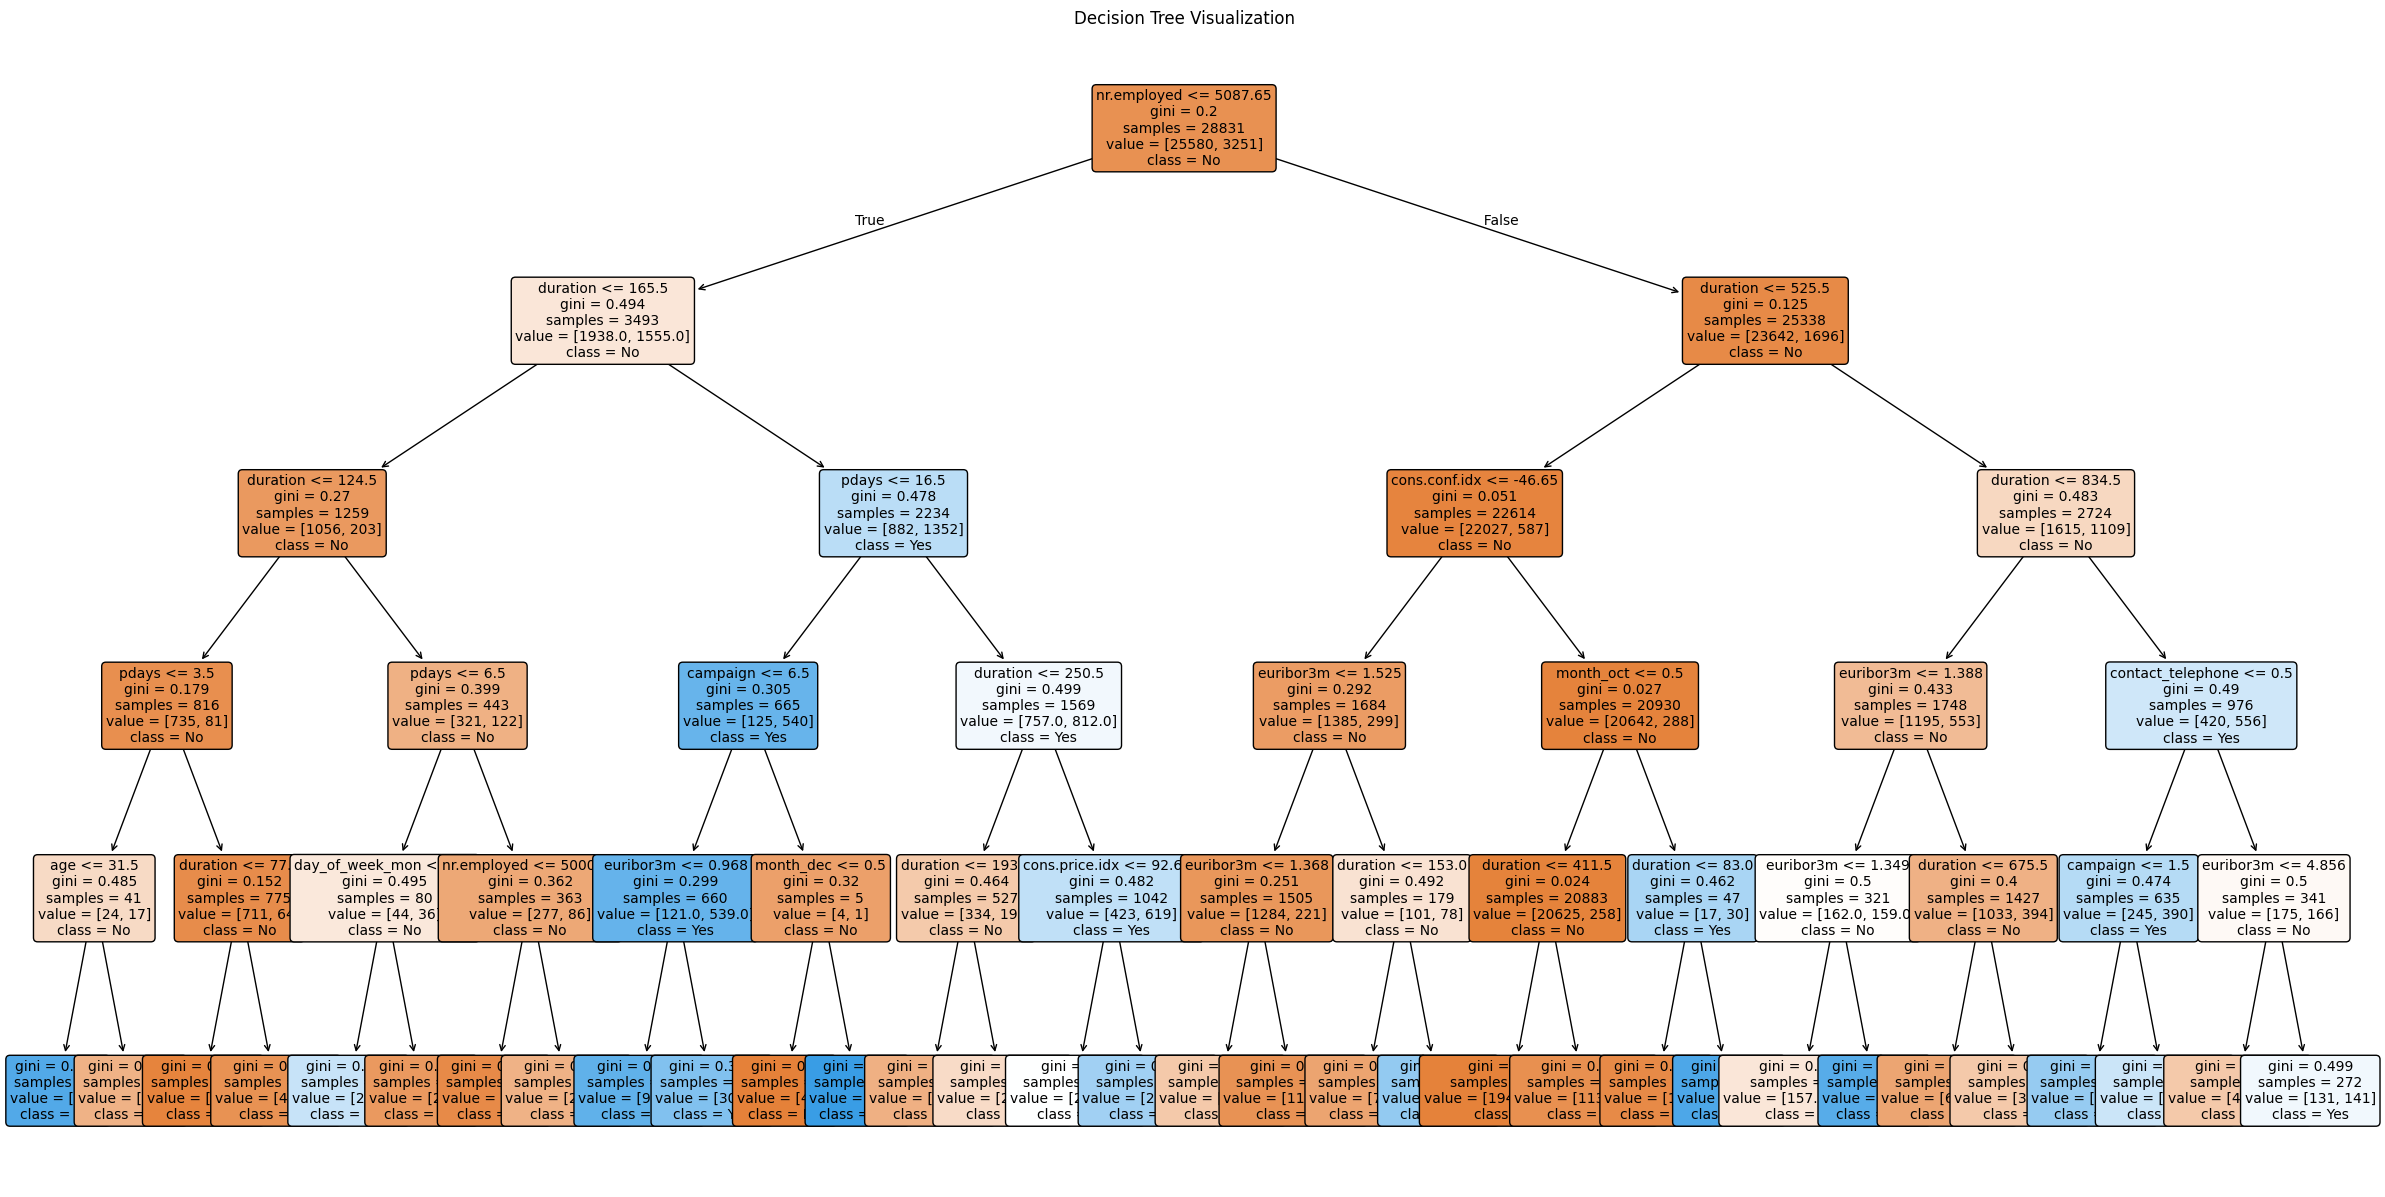

In [9]:
plt.figure(figsize=(30,15))
plot_tree(dt_model, filled=True, feature_names=x.columns, class_names=['No', 'Yes'], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()